# Uvod u TensorFlow

**“Open source software library for 
numerical computation using data flow graphs”**

# Pregled
* Osnovni koncepti
  * Graf i sesija
  * Tenzori
  * Konstante
  * Varijable
  * Placeholderi
* Tensorboard
* Čuvanje i učitavanje

#Pre svega, import

In [0]:
import tensorflow as tf

# Graf i sesija

Svaki **TensorFlow** program se sastoji iz dva dela:

1.   Kreiranje grafa izračunavanja (computational graph), u toku kog se **ne izvršavaju izračunavanja**.
2.   Izvršavanje izračunavanja u kontekstu sesije.

**Graf izračunavanja** je način za predstavu svih izračunavanja koja želimo da izvršimo. Čvorovi grafa transformišu podatke i nazivaju se operacije (**op-ovi**), a granama između čvorova "teku" ti podaci u vidu **tenzora** (otuda ime TensorFlow). O tenzorima će biti više reči u narednoj sekciji.

**Sesija** je objekat koji enkapsulira okruženje u kom se izvršavaju operacije i konačno dobijaju vrednosti u vidu tenzora. Svaki put kada želimo da pokrećemo izračunavanja nad izgrađenim grafom moramo koristiti sesiju (klasa `tf.Session`).

# Tenzori

**Tenzor** je uopštenje matrica i vektora na proizvoljan broj dimenzija. **Rang/rank** predstavlja broj dimenzija tenzora. Pritom razlikujemo:
* Tenzore ranga 0 - skalari
* Tenzore ranga 1 - vektori
* Tenzore ranga 2 - matrice
* Tenzore ranga 3 - "matrice u prostoru"
* ...

Svi rezultati op-ova u TensorFlow-u su predstavljeni u vidu tenzora (klasa `tf.Tensor`). Tim tenzorima manipulišemo i nad njima izvršavamo operacije. Svaki tenzor ima:
* Tip (dtype): float32, int32, string...
* Oblik (shape): n-torka celih brojeva koja označava dužinu tenzora po odgovarajućoj dimenziji.

Konstante, promenljive i placeholderi koje ćemo u nastavku uvesti su tri glavna tipa tenzora koji se koriste u TensorFlow-u.

# Konstante

**Konstante** su tenzori čije vrednosti su uvek iste i sačuvane su u samoj definiciji grafa.

Konstante se kreiraju op-om [`tf.constant`](https://www.tensorflow.org/api_docs/python/tf/constant) pri čijem se pozivu pored vrednosti mogu opciono navesti i tip podataka, oblik i ime rezultujućeg tenzora.



# Prvi primer TensorFlow programa


In [2]:
# Gradimo jednostavan graf od tri op-a. Primetiti kako tip moze biti dat 
# eksplicitno ili implicitno.
a = tf.constant(5.0)  
b = tf.constant(6, dtype=tf.float32, name='B')
c = tf.multiply(a, b)
print(c)

# Primetimo da stampanje promenljive 'c' ne vraca vrednost vec objekat klase 
# tf.Tensor - ovo se desava jer smo za sad samo izgradili graf ali jos uvek 
# nismo izvrsili izracunavanja. Kako bismo ih izvrsili, kreirajmo sesiju.
# Metodi 'run' prosledjujemo jedan ili vise cvorova grafa cije izlaze zelimo 
# da saznamo. U tom momentu se vrsi izracunavanje tog i svih cvorova od kojih
# taj cvor zavisi.
sess = tf.Session()
print(sess.run(c))
sess.close()

# Sesiju je potrebno zatvoriti. Kako bismo ovo izbegli cesto koristimo context
# menadzer sintaksu:
with tf.Session() as sess:
    print(sess.run(c))
    
# Rezultat je isti, ali u ovom slucaju nema potrebe za eksplicitnim zatvaranjem 
# sesije - sav kod za sesiju se nalazi u scope-u context menadzera.

Tensor("Mul:0", shape=(), dtype=float32)
30.0
30.0


## Primer višedimenzionih tenzora

In [3]:
# Kako radimo interaktivno u jupyter notebook-u, vazno je da svaki put kada 
# zelimo da gradimo novi graf obrisemo prethodni.
tf.reset_default_graph()

# a - vektor, b - matrica.
a = tf.constant([2, 2], name='a')
b = tf.constant([[0, 1], [2, 3]], name='b')
print(a)
print(b)

# Sabiranje i mnozenje po koordinatama.
zbir_c = tf.add(a, b, name='add')
proizvod_c = tf.multiply(a, b, name='mul')

# Mnozenje matrica 1x2 i 2x2. Da bi ova operacija uspela, potrebno je vektor a
# tretirati kao matricu 1x2, ovo postizemo metodom 'tf.reshape'.
proizvod = tf.matmul(tf.reshape(a, [1, 2]), b, name='matmul')

# 'run' metodi mozemo proslediti vise cvorova za evaluaciju.
with tf.Session() as sess:
    print('Rezultat:')
    print(sess.run([zbir_c, proizvod_c, proizvod]))

Tensor("a:0", shape=(2,), dtype=int32)
Tensor("b:0", shape=(2, 2), dtype=int32)
Rezultat:
[array([[2, 3],
       [4, 5]], dtype=int32), array([[0, 2],
       [4, 6]], dtype=int32), array([[4, 8]], dtype=int32)]



## Česti op-ovi koji takođe daju konstantne tenzore:
* [`tf.zeros`](https://www.tensorflow.org/api_docs/python/tf/zeros) - vraća tenzor datog oblika popunjen nulama
* [`tf.ones`](https://www.tensorflow.org/api_docs/python/tf/ones) - vraća tenzor datog oblika popunjen jedinicama
* [`tf.fill`](https://www.tensorflow.org/api_docs/python/tf/fill) - vraća tenzor datog oblika popunjen proizvoljnom skalarnom vrednošću


In [4]:
tf.reset_default_graph()

a = tf.zeros([2, 3], tf.int32, name='a')
b = tf.ones([2, 1], tf.int32, name='b')
c = tf.fill([2, 1, 3], 8.0)

with tf.Session() as sess:
    print('a:', sess.run(a))
    print('b:', sess.run(b))
    print('c:', sess.run(c))

a: [[0 0 0]
 [0 0 0]]
b: [[1]
 [1]]
c: [[[8. 8. 8.]]

 [[8. 8. 8.]]]


## Još neki malo kompleksniji op-ovi za dobijanje konstanti
* [`tf.linspace`](https://www.tensorflow.org/api_docs/python/tf/linspace) - generiše zadat broj vrednosti u intervalu
* [`tf.range`](https://www.tensorflow.org/api_docs/python/tf/range) - generiše niz brojeva zadatak početkom, krajem i korakom
* [`tf.random_normal`](https://www.tensorflow.org/api_docs/python/tf/random_normal) - normalna raspodela
* [`tf.random_uniform`](https://www.tensorflow.org/api_docs/python/tf/random_normal) - uniformna raspodela

In [5]:
tf.reset_default_graph()

# Postavljanje seed-a. Sa istom vrednoscu seed-a za dva pokretanja programa
# dobijamo iste nasumicne brojeve.
tf.set_random_seed(1)

a = tf.linspace(10.0, 12.0, 5)
b = tf.range(1, 10, 2)
c = tf.random_normal([3, 3], mean=-1, stddev=4)
d = tf.random_uniform([5], minval=2, maxval=10)

with tf.Session() as sess:
  print('a:', sess.run(a))
  print('b:', sess.run(b))
  print('c:', sess.run(c))
  print('d:', sess.run(d))
  print('d ponovo:', sess.run(d))

a: [10.  10.5 11.  11.5 12. ]
b: [1 3 5 7 9]
c: [[-9.371896   1.8877311  2.2890332]
 [-1.8387415  7.3358784 -4.508169 ]
 [-2.529273  -5.814917   1.4568174]]
d: [8.484254  8.409284  8.833096  7.999032  3.9565115]
d ponovo: [5.0431376 8.73207   8.058373  7.013489  4.362112 ]


# Varijable

**Varijable** u TF (klasa [`tf.Variable`](https://www.tensorflow.org/api_docs/python/tf/Variable)) su tenzori čije vrednosti se mogu menjati op-ovima. Za razliku od "običnih" tenzora, varijable održavaju svoju vrednost u okviru sesije kroz više poziva metodi `session.run`. 

Varijablama se zadaju početne vrednosti tenzorskog tipa. Naravno, ova početna vrednost se ne dodeljuje varijablama pri izgradnji grafa, već u okviru sesije. Za ovo je neophodno pozvati poseban op `tf.global_variables_initializer`. Ovaj op, za razliku od onih koje smo videli do sada, nema tenzorsku povratnu vrednost (vraća `None`) ali kao *side effect* vrši postavljanje svih promenljivih  u grafu na njihove početne vrednosti. Ako ne želimo da inicijalizujemo sve već samo određene promenljive možemo koristiti `tf.variables_initializer`.

Drugi način da postavimo vrednost promenljive je op [`tf.assign`](https://www.tensorflow.org/api_docs/python/tf/assign). Ovaj op postavlja vrednost promenljive na zadatu vrednost i tu vrednost takođe vraća kao tenzor.

In [7]:
tf.reset_default_graph()

# Razni tipovi varijabli (skalar, vektor, matrica nula).
a = tf.Variable(2)
b = tf.Variable([2, 3])
c = tf.Variable(tf.zeros([2, 2]))

# Kreiramo op koji inicijalizuje sve promenljive.
init = tf.global_variables_initializer()

# Menjamo promenljivu a.
a_sabrano = a.assign(tf.add(a, 5))
a_pomnozeno = a.assign(tf.multiply(a, 10))

with tf.Session() as sess:
    print(sess.run(init))  # Ne vraca nista, nema smisla stampati.
    print('a:', sess.run(a))
    print('b:', sess.run(b))
    print('c:', sess.run(c))
    print('-------------')
    print(sess.run(a_sabrano))
    print(sess.run(a))
    print(sess.run(a_pomnozeno))
    print(sess.run(a))
    sess.run(init)  # Resetujemo a.
    print(sess.run(a))

None
a: 2
b: [2 3]
c: [[0. 0.]
 [0. 0.]]
-------------
7
7
70
70
2


# Placeholderi

Možemo primetiti da grafovi koje smo do sada gradili uvek proizvode isti rezultat. 

**Placeholderi** (op [`tf.placeholder`](https://www.tensorflow.org/api_docs/python/tf/placeholder)) predstavljaju parametre u grafu koje možemo popuniti pri izvršavanju. Jedan placeholder je zapravo "obećanje" da će na tom mestu pri pokretanju biti popunjena vrednost. Popunjavanje vrednosti se vrši `feed_dict` argumentom metode `run`.

Analogija: Posmatrajmo funkciju $f(x, y) = x*2 + y$. $x$ ili $y$, $x$, su u ovom slučaju placeholderi za prave vrednosti. Bez znanja njihovih vrednosti možemo izgraditi graf izračunavanja. Kada su njihove vrednosti prisutne možemo zapravo izvršiti izračunavanje.

In [8]:
tf.reset_default_graph()

x = tf.placeholder(shape=(1, 3), dtype=tf.float32)
y = tf.matmul(x, tf.transpose(x))  # Mnozenje matrica 1x3 i 3x1
z = tf.multiply(x, 2) 

with tf.Session() as sess:
    
    # Obe ove linije daju gresku jer zavise od x cija vrednost nije feed-ovana.
    # print(sess.run(x))
    # print(sess.run(y))
    
    # Kroz 'feed_dict' dictionary postavljamo vrednost za x. Obratiti paznju da 
    # x: [1, 2, 3] ne bi radilo jer je to vektor a ne matrica 1x3.
    print(sess.run([y, z], feed_dict={x: [[1, 2, 3]]}))
    
    # U 5 poziva dajmo razlicite vrednosti za x.
    for i in range(5):
        print('Poziv', i, ':', sess.run(z, {x : [[i, 0, i]]}))

[array([[14.]], dtype=float32), array([[2., 4., 6.]], dtype=float32)]
Poziv 0 : [[0. 0. 0.]]
Poziv 1 : [[2. 0. 2.]]
Poziv 2 : [[4. 0. 4.]]
Poziv 3 : [[6. 0. 6.]]
Poziv 4 : [[8. 0. 8.]]


# Primer: kvadratna jednačina $ax^2+bx+c=0$ za $a\ne 0$

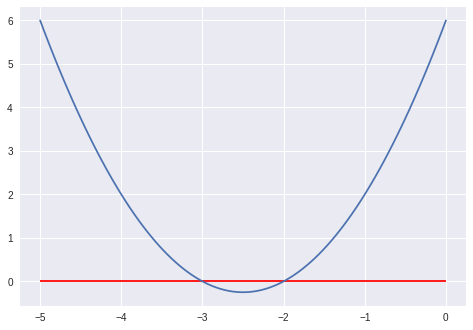

Resenja: [-2.0, -3.0]
Resenja: [-0.2, -1.0]


In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Metoda za plotovanje kvadratne jednacine
def plot_eq(coeffs):
  xs = np.linspace(-5, 0, 100).tolist()
  ys = [coeffs[0] * x * x + coeffs[1] * x + coeffs[2] for x in xs]
  plt.plot(xs, ys)
  plt.hlines([0], -5, 0, colors='r')
  plt.show()

tf.reset_default_graph()
  
a = tf.placeholder(dtype=tf.float32)
b = tf.placeholder(dtype=tf.float32)
c = tf.placeholder(dtype=tf.float32)

# Dve nove stvari: matematicki op-ovi (sqrt, pow) i overloadovane funkcije
# (mnozenje, oduzimanje). Imati u vidu da je '*' ovde zapravo 'tf.multiply'.
d = tf.sqrt(tf.pow(b, 2) - 4*a*c)

x1 = tf.divide(-b + d, 2*a)
x2 = tf.divide(-b - d, 2*a)

with tf.Session() as sess:
    plot_eq([1, 5, 6])
    print('Resenja:', sess.run([x1, x2], feed_dict={a:1, b:5, c:6}))
    print('Resenja:', sess.run([x1, x2], feed_dict={a:5, b:6, c:1}))

# Tensorboard
Uz tensorflow dolazi i pomoćni alat  **tensorboard**. Tensorboard služi za vizualizacije grafova, rezultata i međurezultata TensorFlow koda, i vrlo je koristan alat pri debagovanju.

Za najjednostavniji primer korišćenja tensorboard-a, vizualizujmo graf izvršavanja u primeru kvadratne jednačine. Ovo radimo metodama klase `tf.summary.FileWriter` kao u kodu ispod.

```
writer = tf.summary.FileWriter('.')
writer.add_graph(tf.get_default_graph())
writer.flush()
```

Nakon uspešnog izvršavanja koda u direktorijumu koji smo zadali kao direktorijum za log fajlove (u našem slučaju to je trenutni) nalaziće se fajl nazvan `events.out.tfevents.{timestamp}.{hostname}`. Ovaj tip fajlova tensorboard zna da pročita i automatski prikaže nakon što ga pokrenemo.

Tensorboard pokrećemo iz terminala komandom `tensorboard --logdir .`, pri čemu tačku treba zameniti putanjom do foldera sa log fajlovima ukoliko nisu u trenutnom direktorijumu. Ovo (na portu 6006) otvara tensorboard server i odmah vidimo naš graf.

Tensorboard je prirodan za eksperimentisanje u lokalu; ako želimo da ga koristimo u okviru Google Colab okruženja kod izgleda malo drukčije i koristi se `tensorboardcolab` biblioteka. 



In [10]:
!pip install tensorboardcolab


In [11]:
from tensorboardcolab import * 

tf.reset_default_graph()

# Primetiti da je sada vazno imenovati sve cvorove grafa. Imena python 
# promenljivih se ne reflektuju u tensorboard-u.
a = tf.placeholder(dtype=tf.float32, name='a')
b = tf.placeholder(dtype=tf.float32, name='b')
c = tf.placeholder(dtype=tf.float32, name='c')

d = tf.sqrt(tf.pow(b, 2) - 4*a*c, name='d')

x1 = tf.divide(-b + d, 2*a, name='x1')
x2 = tf.divide(-b - d, 2*a, name='x2')

# Ispisivanje log fajla za tensorboard.
tbc = TensorBoardColab()
writer = tbc.get_writer()
writer.add_graph(tf.get_default_graph())
writer.flush()

with tf.Session() as sess:
    print('Resenja:', sess.run([x1, x2], feed_dict={a:1, b:5, c:6}))
    print('Resenja:', sess.run([x1, x2], feed_dict={a:5, b:6, c:1}))

Using TensorFlow backend.


Wait for 8 seconds...
TensorBoard link:
http://63852354.ngrok.io
Resenja: [-2.0, -3.0]
Resenja: [-0.2, -1.0]


# Čuvanje i učitavanje vrednosti promenljivih

Često je poželjno sačuvati vrednosti svih promenljivih u grafu na disk u vidu checkpoint-a i te vrednosti ponovo učitati u nekom drugom trenutku. Ovo postiže klasa `tf.train.Saver`.

In [12]:
tf.reset_default_graph()

# Kreiramo jednu jednostavnu promenljivu.
a = tf.Variable(2)
init = tf.global_variables_initializer()

# Kreiramo saver objekat.
saver = tf.train.Saver()

with tf.Session() as sess:
    
    sess.run(init)
    print(sess.run(a))
    print(sess.run(a.assign(tf.add(a, 5))))
    print(sess.run(a))
    
    # Pravimo checkpoint.
    saver.save(sess, '/tmp/a.ckpt')
    print('Checkpoint sacuvan')

2
7
7
Checkpoint sacuvan


In [14]:
with tf.Session() as sess:
    # Ova linija bi prijavila gresku: u novoj sesiji a nema vrednost.
    # print(sess.run(a))
    
    # Postavljamo pocetnu vrednost.
    sess.run(init)
    print(sess.run(a))
    
    # Ucitavamo checkpoint.
    saver.restore(sess, '/tmp/a.ckpt')
    print('Checkpoint ucitan')
    print(sess.run(a))

2
INFO:tensorflow:Restoring parameters from /tmp/a.ckpt
Checkpoint ucitan
7
